# I. Condorcet's Jury Theorem (1785)

Assume voter probability be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging)

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers)

Notes: Avoid loops where possible.

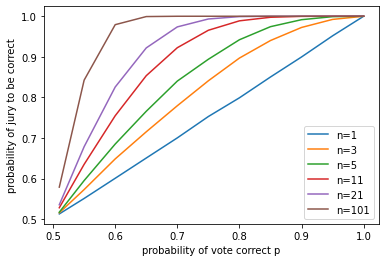

In [ ]:
# Implement here
import matplotlib.pyplot as plt
import numpy as np
import math

def monte_carlo(num_jurys):

    random_votes = 50000
    votes = []
        
    for p_index,p in enumerate(probs):
        votes.append([])
        
        for jury_index in range(num_jurys):
            #generate 1000 votes from binomial distribution - 1= correct, 0 -wrong
            votes[p_index].append(np.random.binomial(1,p,random_votes)) 

    for index, p_vote in enumerate(votes):
        
        votes[index] = sum(p_vote,0)
        
        for i,vote in enumerate(votes[index]):
            if vote >= math.ceil(num_jurys/2):
                votes[index][i] = 1
            else:
                votes[index][i] = 0
    
    jury_correct_prob = [sum(x)/random_votes for x in votes]
    return jury_correct_prob      
        
probs = [0.51,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]    

jury_correct_prob_1 = monte_carlo(1)

jury_correct_prob_3 = monte_carlo(3)
jury_correct_prob_5 = monte_carlo(5)
jury_correct_prob_11 = monte_carlo(11)
jury_correct_prob_21 = monte_carlo(21)
jury_correct_prob_101 = monte_carlo(101)

plt.plot(probs, jury_correct_prob_1,label="n=1")
plt.plot(probs, jury_correct_prob_3,label="n=3")
plt.plot(probs, jury_correct_prob_5,label="n=5") 
plt.plot(probs, jury_correct_prob_11,label="n=11")
plt.plot(probs, jury_correct_prob_21,label="n=21") 
plt.plot(probs, jury_correct_prob_101,label="n=101")

plt.xticks(np.arange(0.5, 1.01, step=0.1))
plt.xlabel("probability of vote correct p")
plt.ylabel("probability of jury to be correct")
plt.legend(loc='best')
plt.show()


Proof:
<br>Lets state our case:
$$
X_{i} =
\begin{cases}
1 & \text{if correct} \\
-1 & \text{if wrong } \\
\end{cases}
$$

So, we need to prove that:

$$
\lim_{n\to\infty} P(\sum_{i=0}^{n} X_{i}>0) = 1
$$

and because n is a positive number we can prove that:

$$
\lim_{n\to\infty} P(\frac {\sum_{i=0}^{n} X_{i}}{n} > 0) = 1 
$$



<br> according to the law of large numbers: 
$$\forall_{\epsilon >0} \lim_{n\to\infty} P(|\bar X_{n} - \mu |<\epsilon)=1 $$

Because $p>.5$ implies $\mu >0$ so a specific case is when $\epsilon = \mu$:

$$
P(\bar X_{n}>0) \geq P(\bar X_{n}>0 \cap \bar X_{n} <2\mu) = P(-\mu < \bar X_{n} - \mu <\mu) = P(|\bar X_{n} - \mu |<\mu)
$$

Since the last expression tends to 1 as n → ∞, the first expression does too.

# II. AdaBoost
*  receive a method for creating a weak learner, which has a fit and predict methods/
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm with the next parameters:
        - *tol=1e-10, loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train and 1/3 test sets.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function (or your own) to plot the final decision plane of each ensemble model.
## Answer to the next questions:

 1. How does the overall train set accuracy changes with $n$?
 2. Does you model starts to overfit at some point? How can you test and detect such point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note1:** 
 1. If ***linearSVC*** doesn't work, you can use ***SVC*** with: `kernel='linear'` and `probability=True`
 2. Explanation you results in text and support it with figures.

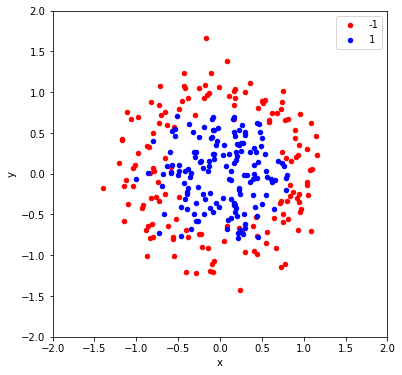

In [ ]:
#implement here
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
import numpy as np

def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accept X and return the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    #df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    df = DataFrame(dict(x0=X['x'], x1=X['y'], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key], fontsize = 10)
  
    # decision boundary
    #xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    xx1, xx2 = make_meshgrid(X['x'], X['y'])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


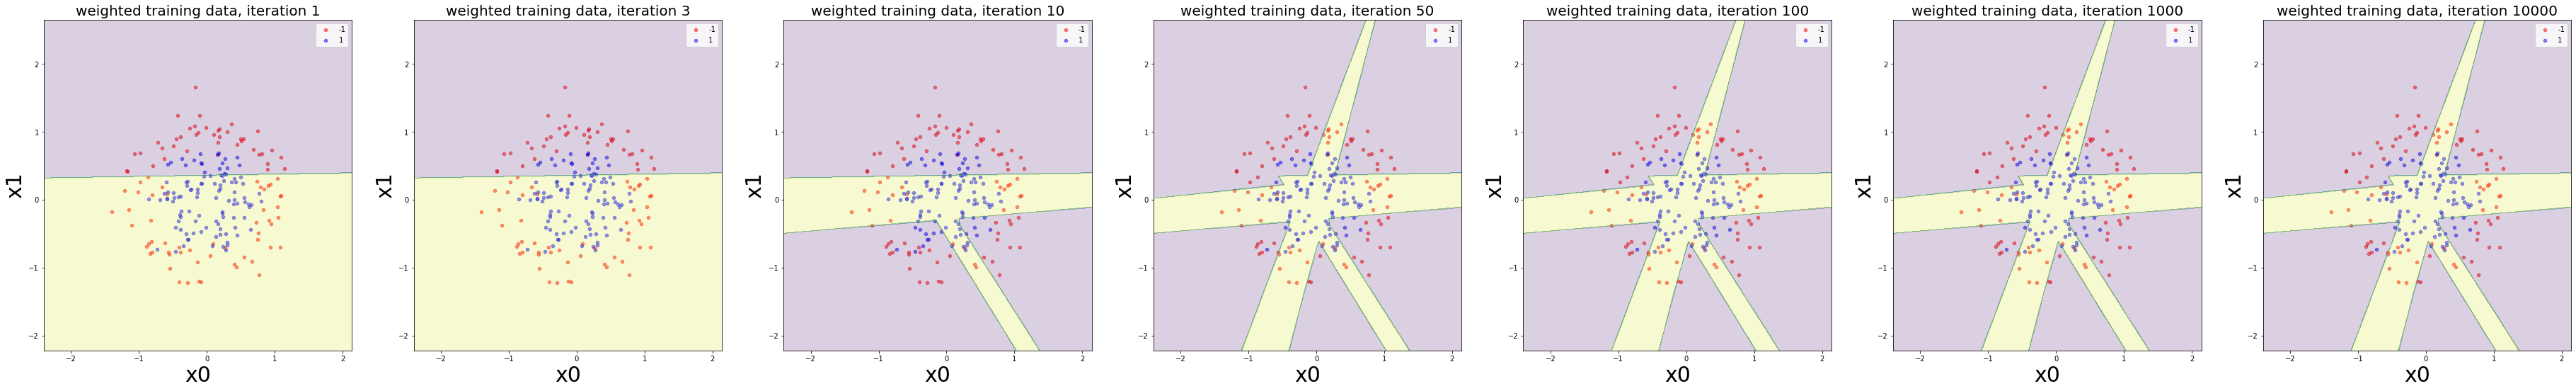

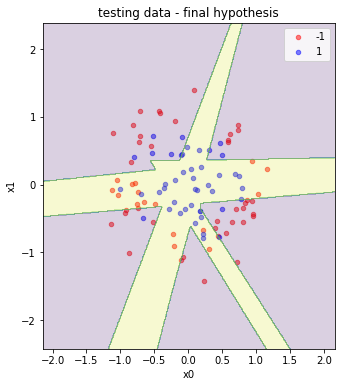

In [ ]:
# Implement here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


estimators = [1, 3, 10, 50, 100, 1000, 10000]

svc = LinearSVC(tol=1e-10, loss='hinge', C=1000, max_iter=50000)

X_train, X_test, y_train, y_test = train_test_split(df[['x','y']],df['label'], train_size = 2/3, random_state=24)

fig, axs = plt.subplots(1,7,figsize=(64,64))

for j,estimator in enumerate(estimators):
    ada = AdaBoostClassifier(base_estimator = svc, n_estimators = estimator, algorithm='SAMME')
    ada.fit(X_train,y_train)
    plot_data(X_train, y_train, ada.predict, axs[j])
    axs[j].set_title(f'weighted training data, iteration {estimator}', fontsize=20)
    axs[j].set_xlabel('x0', fontsize = 30)
    axs[j].set_ylabel('x1', fontsize = 30)

plt.show()

fig_test, axs_test = plt.subplots(figsize=(6,6))
plot_data(X_test, y_test, ada.predict, axs_test)
axs_test.set_title(f'testing data - final hypothesis')
axs_test.set_xlabel('x0')
axs_test.set_ylabel('x1')
plt.show()



# Your answers here

1. The overall train set accuracy grows up as the number of estimators n grows too, but it starts to plateau at some level, so increasing the number of estimators would not help anymore. 

2. It doesn't seem like the model is overfit. 

3. the optimal number of estimators is 22. because after this amount the error of the other classifiers is 1, i.e the model doesn't learn anything, and as we can see the weights of those models are equals to zero. so we can stop after this amount of estimators.

In [ ]:
print(f"Errors: {ada.estimator_errors_[0:50]}")
print(f"Weights: {ada.estimator_weights_[0:50]}")

Errors: [0.37       0.47243672 0.4062702  0.4667608  0.46660432 0.49007397
 0.42131566 0.45096717 0.47624947 0.48179877 0.49730788 0.493468
 0.44346978 0.42860569 0.46995994 0.45261029 0.48549488 0.45155027
 0.49062548 0.44263974 0.48208286 0.48270915 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
Weights: [0.53221681 0.110365   0.37940586 0.13315317 0.13378188 0.03970933
 0.3173748  0.1967637  0.09507365 0.07283709 0.01076859 0.02612947
 0.2270918  0.28754216 0.12030514 0.19012952 0.05803677 0.19440893
 0.03750247 0.23045561 0.07169925 0.06919099 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   